In [1]:
import os
import sys
import numpy as np
import pandas as pd
import csv
import matplotlib
import matplotlib.pyplot as plt
from tqdm import tqdm

In [20]:
data_dir = "/mnt/c/Users/ruotong/Home/xERTE/tKGR/data/ml-1m"
print(os.listdir(data_dir))
df = pd.read_csv(os.path.join(data_dir, "ratings.dat"), sep="::",header=None, names=['user','movie','rating','timestamp'])
df = df.reindex(columns=['user','rating','movie','timestamp'])
df.head()

['entity2id.txt', 'movies.dat', 'ratings.dat', 'ratings.txt', 'README', 'relation2id.txt', 'test.txt', 'train.txt', 'users.dat', 'user_time.txt', 'valid.txt']


,user,rating,movie,timestamp
0,1,5,1193,978300760
1,1,3,661,978302109
2,1,3,914,978301968
3,1,4,3408,978300275
4,1,5,2355,978824291


In [21]:
df = df.sort_values(by=['timestamp'])
df.head()
split = [0.7, 0.15, 0.15]
rat_num = len(df)
train_data, val_data, test_data = df[:int(rat_num*split[0])],\
    df[int(rat_num*split[0]) : int(rat_num*(split[0]+split[1]))], \
    df[int(rat_num*(split[0]+split[1])) :]

In [22]:
train_data

,user,rating,movie,timestamp
1000138,6040,4,858,956703932
1000153,6040,4,2384,956703954
999873,6040,5,593,956703954
1000007,6040,4,1961,956703977
1000192,6040,5,2019,956703977
...,...,...,...,...
334424,1974,3,920,974862363
334541,1974,5,2692,974862363
188106,1167,4,11,974862369
187208,1162,3,1248,974862386


In [23]:
val_data

,user,rating,movie,timestamp
187235,1162,3,919,974862386
187266,1162,4,3435,974862386
187409,1163,3,1754,974862390
187420,1163,4,44,974862390
187418,1163,3,1792,974862390
...,...,...,...,...
48463,326,3,3152,976422034
48535,326,4,2716,976422034
47451,319,3,144,976422042
47589,319,3,2759,976422042


In [24]:
test_data

,user,rating,movie,timestamp
48360,326,2,1263,976422054
48364,326,3,1193,976422054
48632,326,3,515,976422083
323378,1917,5,1287,976422083
48562,326,4,3471,976422083
...,...,...,...,...
825793,4958,1,2399,1046454338
825438,4958,5,1407,1046454443
825724,4958,4,3264,1046454548
825731,4958,3,2634,1046454548


In [6]:
df.to_csv('../data/ml-1m/ratings.txt', sep='\t', index=False, header=False)
train_data.to_csv('../data/ml-1m/train.txt', sep='\t', index=False, header=False)
val_data.to_csv('../data/ml-1m/valid.txt', sep='\t', index=False, header=False)
test_data.to_csv('../data/ml-1m/test.txt', sep='\t', index=False, header=False)

In [15]:
movies = pd.read_csv(os.path.join(data_dir, "movies.dat"), sep="::", header=None, names=['movie_id','movie','genre'])
movies.head()
movie_id = dict(zip(movies['movie_id'], movies['movie']))

ids = df['user'].drop_duplicates().sort_values()
users = ids.apply(lambda x: 'user' + str(x))
# ids = ids.apply(lambda x: x + len(movies))
user_id = dict(zip(ids,users))

# entity_id = {**movie_id, **user_id} # merge two dicts
entity_id = user_id
pd.DataFrame(list(zip(entity_id.values(), entity_id.keys()))).to_csv('../data/ml-1m/entity2id.txt', sep='\t', index=False, header=False)

In [14]:
pd.DataFrame(list(zip(range(1,6), range(1,6)))).to_csv('../data/ml-1m/relation2id.txt', sep='\t', index=False, header= False)

In [50]:
user_time = pd.DataFrame(columns=['user', 'start_ts', 'end_ts'])
new_row = dict().fromkeys(['user', 'start_ts', 'end_ts'])
n = 0
for idx, row in tqdm(df.iterrows(), total=df.shape[0]):
    if not (user_time['user'] == row['user']).any(): # not row['user'] in user_time['user']:
        n += 1
        new_row['user'] = row['user']
        new_row['start_ts'] = row['timestamp']
        new_row['end_ts'] = row['timestamp']
        # print(new_row)
        user_time.loc[n] = new_row.values()
        # user_time.append(new_row, ignore_index=True)
    elif user_time.loc[user_time['user'] == row['user'], 'end_ts' ].item() < row['timestamp']:
        #print(user_time.loc[user_time['user'] == row['user'], 'end_ts' ].item())
        # print("row", row["timestamp"])
    # if user_time.loc[user_time['user'] == row['user'], 'end_ts' ].item() < row['timestamp']:
        user_time.loc[user_time['user'] == row['user'], 'end_ts'] = row['timestamp']
        #user_time.loc[user_time['user'] == row['user'], 'end_ts'] = row['timestamp']
user_time['time'] = user_time['end_ts'] - user_time['start_ts']
    

100%|██████████| 1000209/1000209 [38:04<00:00, 437.77it/s]


(array([4.347e+03, 1.550e+02, 1.040e+02, 8.000e+01, 6.100e+01, 6.100e+01,
        5.100e+01, 3.700e+01, 3.000e+01, 2.100e+01, 3.500e+01, 2.500e+01,
        2.200e+01, 1.500e+01, 1.900e+01, 1.800e+01, 1.800e+01, 1.600e+01,
        2.800e+01, 1.600e+01, 1.800e+01, 1.500e+01, 1.400e+01, 1.100e+01,
        1.600e+01, 1.700e+01, 2.000e+01, 6.000e+00, 1.500e+01, 1.200e+01,
        7.000e+00, 1.100e+01, 9.000e+00, 1.100e+01, 6.000e+00, 1.200e+01,
        9.000e+00, 1.400e+01, 1.200e+01, 2.200e+01, 1.200e+01, 1.000e+01,
        1.100e+01, 1.500e+01, 1.500e+01, 1.300e+01, 1.500e+01, 7.000e+00,
        9.000e+00, 1.300e+01, 9.000e+00, 9.000e+00, 9.000e+00, 1.600e+01,
        6.000e+00, 1.600e+01, 8.000e+00, 9.000e+00, 1.100e+01, 5.000e+00,
        1.300e+01, 5.000e+00, 4.000e+00, 4.000e+00, 1.200e+01, 8.000e+00,
        1.100e+01, 1.400e+01, 1.400e+01, 1.100e+01, 1.400e+01, 1.000e+01,
        1.000e+01, 1.400e+01, 2.400e+01, 1.400e+01, 1.600e+01, 1.700e+01,
        2.300e+01, 3.200e+01, 9.000e+0

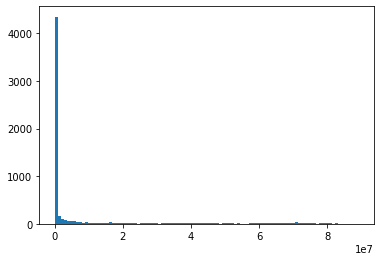

In [54]:
user_time.to_csv('../data/ml-1m/user_time.txt', sep='\t', index=False, header=False)
plt.hist(user_time['time'], bins=100)

(array([3.429e+03, 1.450e+02, 4.700e+01, ..., 0.000e+00, 0.000e+00,
        1.000e+00]),
 array([106.0, 9030.7686, 17955.5372, ..., 89229942.4628, 89238867.2314,
        89247792.0], dtype=object),
 <BarContainer object of 10000 artists>)

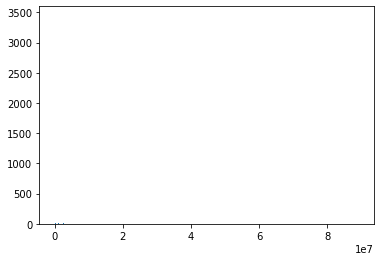

In [64]:
plt.hist(user_time['times'], bins=10000)

In [5]:














# split 1M100K
data_dir = "/mnt/c/Users/ruotong/Home/xERTE/tKGR/data/ml-10M100K"
print(os.listdir(data_dir))
df = pd.read_csv(os.path.join(data_dir, "ratings.dat"), sep="::",header=None, names=['user','movie','rating','timestamp'])
df = df.reindex(columns=['user','rating','movie','timestamp'])
df10M = df.sort_values(by=['timestamp'])
df10M.head()

['allbut.pl', 'entity2id.txt', 'movies.dat', 'ratings.dat', 'ratings.txt', 'README.html', 'relation2id.txt', 'split_ratings.sh', 'tags.dat', 'test.txt', 'train.txt', 'user_time.txt', 'valid.txt']


,user,rating,movie,timestamp
5167075,36955,3.0,21,789652009
5167081,36955,5.0,47,789652009
5167124,36955,3.0,1079,789652009
4961485,35435,5.0,45,822873600
4961483,35435,5.0,21,822873600


In [10]:
df10M = df.sort_values(by=['timestamp'])
# df10M.to_csv('../data/ml-1m/ratings.txt', sep='\t', index=False, header=False)
user_time = pd.DataFrame(columns=['user', 'start_ts', 'end_ts'])
new_row = dict().fromkeys(['user', 'start_ts', 'end_ts'])
n = 0
for idx, row in tqdm(df10M.iterrows(), total=df.shape[0]):
    if not (user_time['user'] == row['user']).any(): # not row['user'] in user_time['user']:
        n += 1
        new_row['user'] = row['user']
        new_row['start_ts'] = row['timestamp']
        new_row['end_ts'] = row['timestamp']
        # print(new_row)
        user_time.loc[n] = new_row.values()
        # user_time.append(new_row, ignore_index=True)
    elif user_time.loc[user_time['user'] == row['user'], 'end_ts' ].item() < row['timestamp']:
        #print(user_time.loc[user_time['user'] == row['user'], 'end_ts' ].item())
        # print("row", row["timestamp"])
    # if user_time.loc[user_time['user'] == row['user'], 'end_ts' ].item() < row['timestamp']:
        user_time.loc[user_time['user'] == row['user'], 'end_ts'] = row['timestamp']
        #user_time.loc[user_time['user'] == row['user'], 'end_ts'] = row['timestamp']
user_time['time'] = user_time['end_ts'] - user_time['start_ts']

100%|██████████| 10000054/10000054 [2:28:10<00:00, 1124.81it/s]


In [15]:
user_time.to_csv('../data/ml-10M100K/user_time.txt', sep='\t', index=False, header=False)

In [6]:
user_time = pd.read_csv('../data/ml-10M100K/user_time.txt', sep='\t', header=None, names=['user', 'start_ts', 'end_ts','time'])

In [7]:
rate_num = len(user_time)
bin =  10
filt_rate = len(user_time[user_time['time'] > max(user_time['time'])/bin])

granularity = max(user_time['time'])/bin
print('Granularity: {}, days = {}'.format(granularity, granularity/(3600*24)))
print("User percentage (above minimum granularity): {} %".format(filt_rate/rate_num*100))
print('')
print('Average time length in total dataset {}, days = {}'.format(np.mean(user_time['time']), np.mean(user_time['time'])/(3600*24)))
print('Median time length in total dataset: {}, days = {}'.format(np.median(user_time['time']), np.median(user_time['time'])/(3600*24)))
print('')
filted_user_time = user_time.loc[user_time['time'] > granularity]
print('Average time length above minimum granularity: {}, days = {}'.format(np.mean(filted_user_time['time']), np.mean(filted_user_time['time'])/(3600*24)))
print('Median time length above minimum granularity: {}, days = {}'.format(np.median(filted_user_time['time']), np.median(filted_user_time['time'])/(3600*24)))



Granularity: 35615984.4, days = 412.22204166666666
User percentage (above minimum granularity): 9.32482326340193 %

Average time length in total dataset 12437913.712427374, days = 143.95733463457609
Median time length in total dataset: 2963.0, days = 0.03429398148148148

Average time length above minimum granularity: 110067339.1218539, days = 1273.9275361325683
Median time length above minimum granularity: 86408279.0, days = 1000.0958217592593


(array([362., 295., 272., 243., 224., 217., 214., 208., 244., 178., 176.,
        159., 140., 114., 113., 118., 114.,  98., 105., 129., 100.,  89.,
         99.,  96.,  98.,  95.,  74.,  69.,  67.,  69.,  61.,  73.,  69.,
         54.,  61.,  62.,  44.,  58.,  47.,  63.,  45.,  33.,  53.,  41.,
         49.,  50.,  36.,  35.,  39.,  35.,  32.,  43.,  29.,  32.,  34.,
         39.,  25.,  26.,  29.,  32.,  34.,  27.,  23.,  31.,  19.,  26.,
         24.,  31.,  38.,  31.,  24.,  20.,  23.,  17.,  23.,  25.,  24.,
         35.,  30.,  39.,   4.,   9.,   1.,   2.,   2.,   2.,   2.,   2.,
          1.,   2.,   5.,   6.,   5.,   2.,   2.,   4.,   1.,   4.,   5.,
          3.]),
 array([3.56204890e+07, 3.88258825e+07, 4.20312761e+07, 4.52366696e+07,
        4.84420632e+07, 5.16474568e+07, 5.48528503e+07, 5.80582438e+07,
        6.12636374e+07, 6.44690310e+07, 6.76744245e+07, 7.08798180e+07,
        7.40852116e+07, 7.72906052e+07, 8.04959987e+07, 8.37013922e+07,
        8.69067858e+07, 9.0112

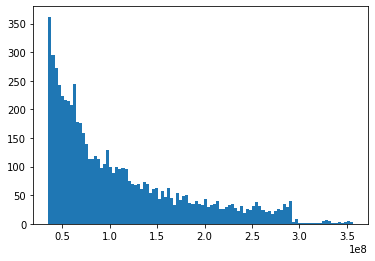

In [21]:
plt.hist(filted_user_time['time'], bins=100)

In [70]:
sub_user = filted_user_time.sort_values(by=['user'])['user'].tolist()
sub_user.sort()
new_user = list(range(1, len(sub_user) + 1))
user_map = dict(zip(sub_user, new_user))

sub_df10M = df10M.loc[df10M.user.isin(sub_user)]
sub_df10M.sort_values(by=['timestamp'])

sub_df10M['user'] = sub_df10M['user'].apply(lambda x: user_map[x])

sub_movie = df10M['movie'].drop_duplicates().sort_values().tolist()
new_movie = list(range(1 + len(new_user), len(sub_movie) + len(new_user) + 1))
movie_map = dict(zip(sub_movie, new_movie))
# sub_df10M['movie'] = sub_df10M['movie'].apply(lambda x: movie_map[x])
# sub_df10M.to_csv('../data/ml-10M100K/sub_rating.dat', sep='::', index=False, header=False)



In [63]:
split = [0.7, 0.15, 0.15]
rat_num = len(sub_df10M)
train_data, val_data, test_data = sub_df10M[:int(rat_num*split[0])],\
    sub_df10M[int(rat_num*split[0]) : int(rat_num*(split[0]+split[1]))], \
    sub_df10M[int(rat_num*(split[0]+split[1])) :]

sub_df10M.to_csv('../data/ml-10M100K/ratings.txt', sep='\t', index=False, header=False)
train_data.to_csv('../data/ml-10M100K/train.txt', sep='\t', index=False, header=False)
val_data.to_csv('../data/ml-10M100K/valid.txt', sep='\t', index=False, header=False)
test_data.to_csv('../data/ml-10M100K/test.txt', sep='\t', index=False, header=False)

In [75]:
new_user_ = ['user' + str(x) for x in new_user]
new_movie_ = ['movie' + str(x - len(new_user)) for x in new_movie]
#new_user = pd.DataFrame(new_user).apply(lambda x: 'user' + str(x))
#new_movie = pd.DataFrame(new_movie).apply(lambda x: 'movie' + str(x))
pd.DataFrame(list(zip(new_user+new_movie, new_user_+new_movie_))).to_csv('../data/ml-10M100K/entity2id.txt', sep='\t', index=False, header= False)
rating = np.linspace(0,5,11).tolist()
pd.DataFrame(list(zip(rating, rating))).to_csv('../data/ml-10M100K/relation2id.txt', sep='\t', index=False, header= False)

In [24]:
print("sub_user: {}".format(len(sub_user)))
print('ratings:{}'.format(len(sub_df10M)))
print('train_data:{} from {} to {}, days =  {}'.format(len(train_data), min(train_data['timestamp']), \
    max(train_data['timestamp']), (max(train_data['timestamp'])-min(train_data['timestamp']))/(3600*24)))
print('valid_data:{} from {} to {}, days = {}'.format(len(val_data), min(val_data['timestamp']), \
    max(val_data['timestamp']), (max(val_data['timestamp'])-min(val_data['timestamp']))/(3600*24)))
print('test_data:{} from {} to {}, days = {}'.format(len(test_data), min(test_data['timestamp']), \
    max(test_data['timestamp']), (max(test_data['timestamp'])-min(test_data['timestamp']))/(3600*24)))



sub_user: 6516
ratings:3005505
train_data:2103853 from 789652009 to 1118177345, days =  3802.376574074074
valid_data:450826 from 1118177352 to 1160397305, days = 488.6568634259259
test_data:450826 from 1160397333 to 1231130500, days = 818.6709143518518


In [3]:
# split 25M






data_dir = "/mnt/c/Users/ruotong/Home/xERTE/tKGR/data/ml-25M"
print(os.listdir(data_dir))
df25 = pd.read_csv(os.path.join(data_dir, "ratings.csv"), sep=",",header=None, names=['user','movie','rating','timestamp'])
# df25 = df.reindex(columns=['user','rating','movie','timestamp'])

['genome-scores.csv', 'genome-tags.csv', 'links.csv', 'movies.csv', 'ratings.csv', 'README.txt', 'tags.csv']


In [1]:
# df25['timestamp'] = pd.to_numeric(df25['timestamp'], errors='ignore')
df25 = df25.sort_values(by=['timestamp'])
df25['timestamp'].head()

NameError: name 'df25' is not defined

In [18]:
df25.head()
df25['timestamp'].head()

0     timestamp
1    1147880044
2    1147868817
3    1147868828
4    1147878820
Name: timestamp, dtype: object